In [4]:
import pandas as pd
import json
import os

# Initialize an empty DataFrame
df = pd.DataFrame()

# Loop through each file in the current directory
for file_name in os.listdir('.'):
    # Check if the file name starts with 'progress' and is a JSON file
    if file_name.startswith('progress') and file_name.endswith('.json'):
        # Read and append the data to the DataFrame
        with open(file_name, 'r') as file:
            data = json.load(file)
            temp_df = pd.DataFrame([{"target": entry["target"], **{k: int(v) if k != "activation" and k != "learning_rate" else v for k, v in entry["params"].items()}} for entry in data])
            df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
print(df)


      target  activation  batch_size  dense_size  kernel_size  learning_rate  \
0   0.993572    0.417022          27          32            3       0.001553   
1   0.814348    0.223964          31          83            4       0.008338   
2   0.992286    0.705863          28          32            4       0.003494   
3   0.789920    0.417022          27          32            3       0.001553   
4   0.948316    0.223964          31          49            4       0.008338   
5   0.000000    0.660944          30          48            4       0.009202   
6   0.000000    0.964941          17          33            4       0.005833   
7   0.806634    0.417022          27          32            3       0.001553   
8   0.939059    0.223964          31          49            4       0.008338   
9   0.000000    0.660944          30          48            4       0.009202   
10  0.898689    0.417022          27          32            3       0.001553   
11  0.851633    0.223964          31    

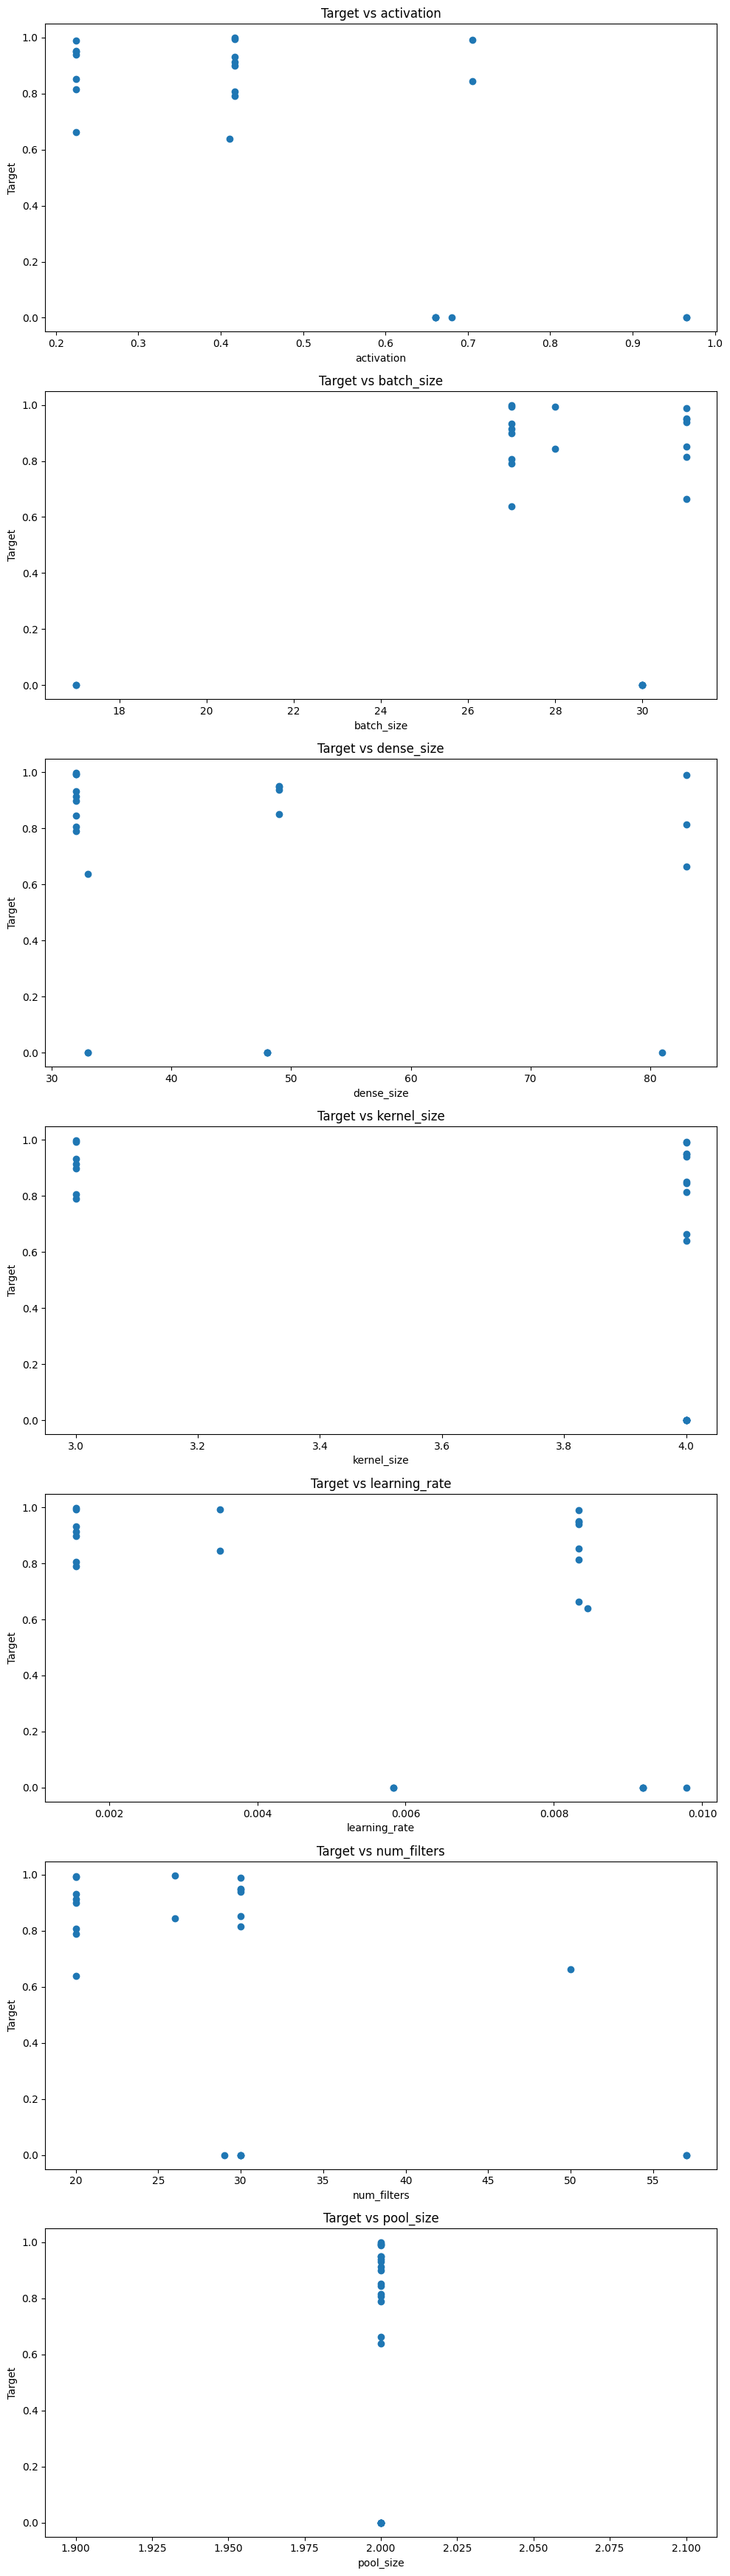

In [5]:
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame with the loaded data
# Plotting scatter plots for each parameter against the target

# List of parameters
parameters = df.columns.drop('target')

# Create a figure and set of subplots
fig, axs = plt.subplots(len(parameters), figsize=(10, len(parameters)*5))

for i, param in enumerate(parameters):
    axs[i].scatter(df[param], df['target'])
    axs[i].set_title(f'Target vs {param}')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Target')

# Adjust layout
plt.tight_layout()

plt.show()


In [10]:
import pandas as pd

# Assuming temp_df is your DataFrame and it's already created

# Get all unique parameter names (excluding 'target')
param_names = set(key for entry in data for key in entry['params'])

# Dictionary to store the average target for each parameter value
average_targets = {param: {} for param in param_names}

for param in param_names:
    # Handle the 'activation' parameter differently
    if param == 'activation':
        # Create a new column in the DataFrame for grouping activation values
        temp_df['activation_group'] = temp_df['activation'].apply(lambda x: 'relu' if x < 0.5 else 'sigmoid')

        # Group by the new column and calculate the mean of the target
        activation_averages = temp_df.groupby('activation_group')['target'].mean()

        # Store the results
        average_targets[param] = activation_averages.to_dict()
    else:
        # For other parameters, proceed as before
        filtered_df = temp_df[temp_df[param].notnull()]
        averages = filtered_df.groupby(param)['target'].mean()
        average_targets[param] = averages.to_dict()

# average_targets now contains the average target for each value of each parameter



In [11]:
average_targets

{'num_filters': {20: 0.9318590760231018, 30: 0.475443571805954, 57: 0.0},
 'activation': {'relu': 0.9413731098175049, 'sigmoid': 0.0},
 'kernel_size': {3: 0.9318590760231018, 4: 0.3169623812039693},
 'batch_size': {17: 0.0,
  27: 0.9318590760231018,
  30: 0.0,
  31: 0.950887143611908},
 'learning_rate': {0.0015528833190894193: 0.9318590760231018,
  0.005832716844713839: 0.0,
  0.00833765208057276: 0.950887143611908,
  0.009201642293015339: 0.0},
 'dense_size': {32: 0.9318590760231018,
  33: 0.0,
  48: 0.0,
  49: 0.950887143611908},
 'pool_size': {2: 0.47068655490875244}}

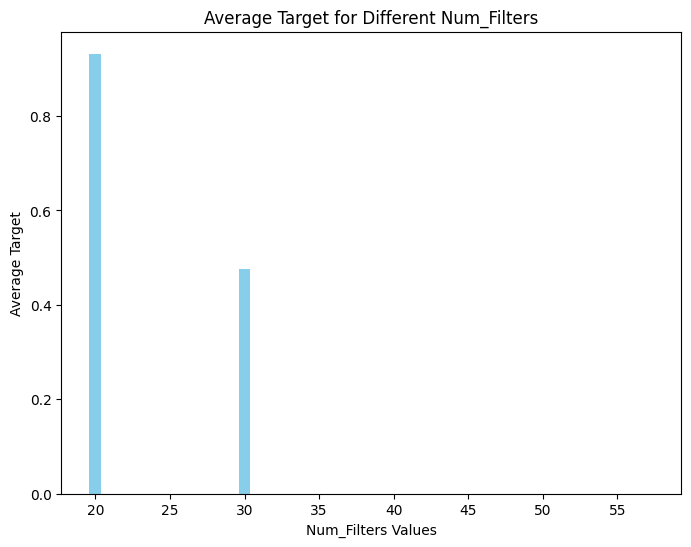

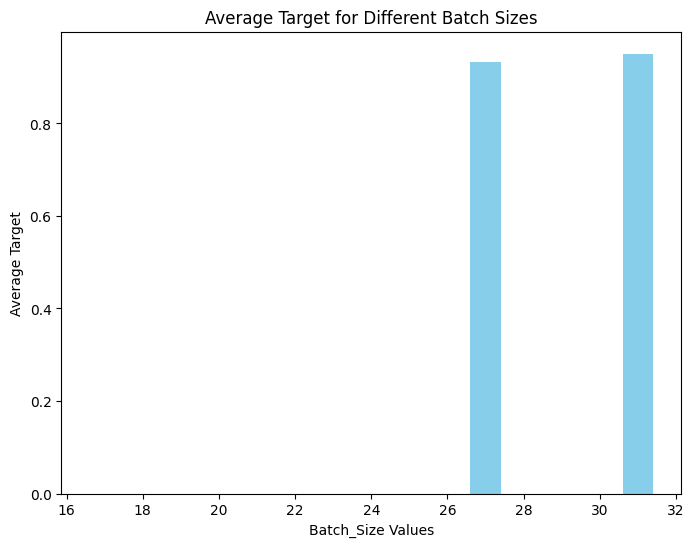

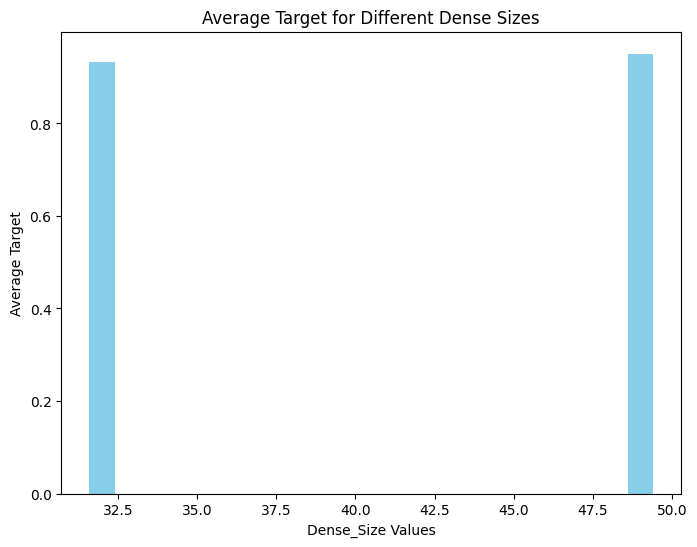

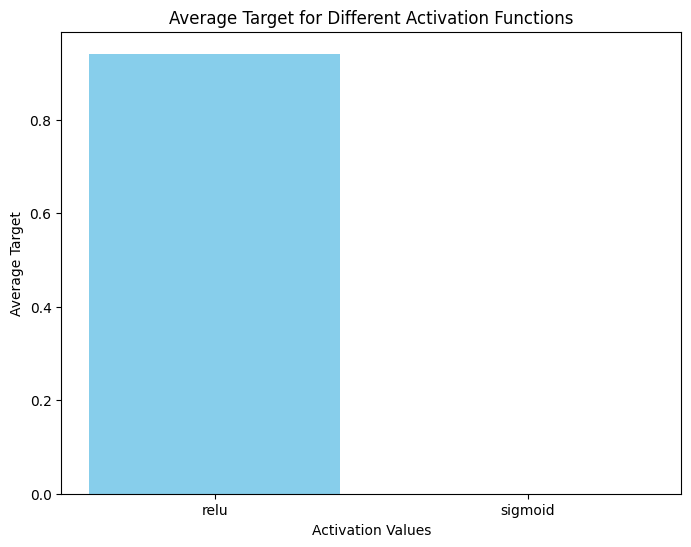

In [14]:
import matplotlib.pyplot as plt


# Function to create a bar chart for a given parameter
def create_bar_chart(parameter, title):
    keys = list(average_targets[parameter].keys())
    values = list(average_targets[parameter].values())

    plt.figure(figsize=(8, 6))
    plt.bar(keys, values, color='skyblue')
    plt.xlabel(f'{parameter.title()} Values')
    plt.ylabel('Average Target')
    plt.title(title)
    plt.show()

# Create bar charts for num_filters, batch_size, dense_size, and activation
create_bar_chart('num_filters', 'Average Target for Different Num_Filters')
create_bar_chart('batch_size', 'Average Target for Different Batch Sizes')
create_bar_chart('dense_size', 'Average Target for Different Dense Sizes')
create_bar_chart('activation', 'Average Target for Different Activation Functions')


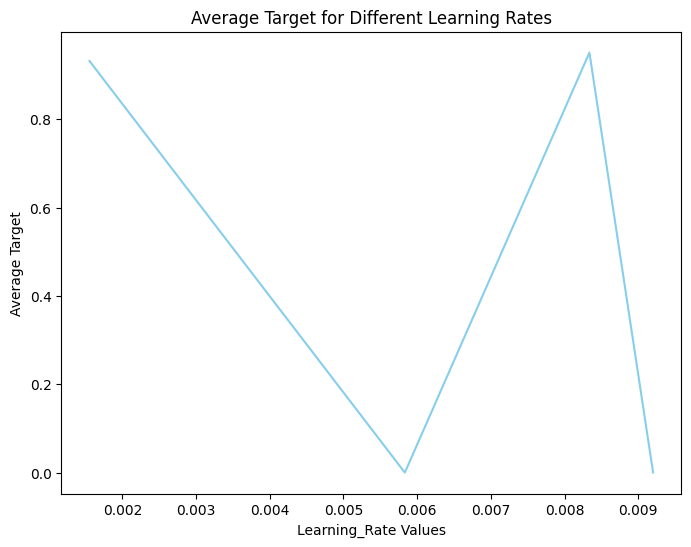

In [16]:
# Function to create a bar chart for a given parameter
def create_line_chart(parameter, title):
    keys = list(average_targets[parameter].keys())
    values = list(average_targets[parameter].values())

    plt.figure(figsize=(8, 6))
    plt.plot(keys, values, color='skyblue')
    plt.xlabel(f'{parameter.title()} Values')
    plt.ylabel('Average Target')
    plt.title(title)
    plt.show()

# Create bar charts for num_filters, batch_size, dense_size, and activation
create_line_chart('learning_rate', 'Average Target for Different Learning Rates')


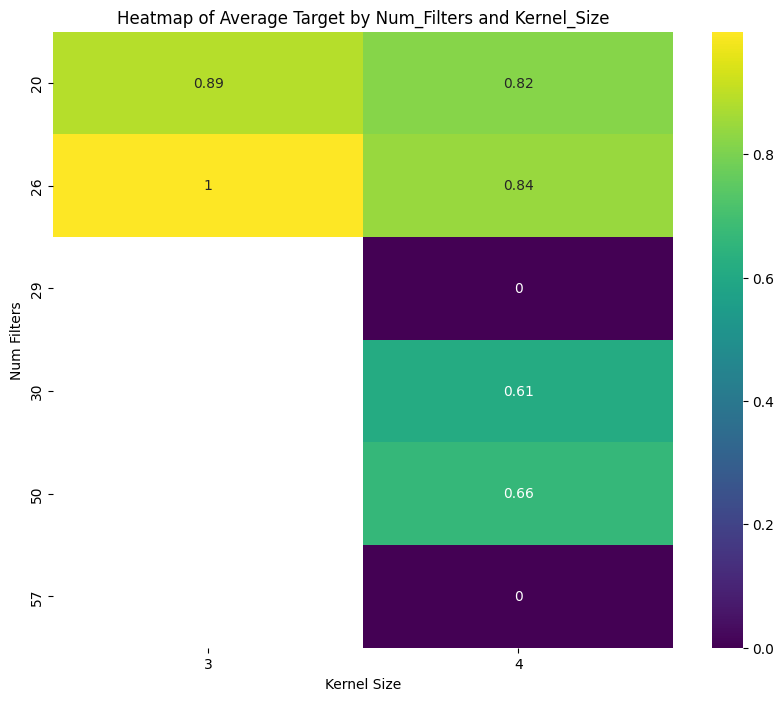

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and has columns 'num_filters', 'kernel_size', and 'target'

# Step 1: Pivot the DataFrame
pivot_table = df.pivot_table(index='num_filters', columns='kernel_size', values='target', aggfunc='mean')

# Step 2: Create the Heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size to fit your needs
sns.heatmap(pivot_table, annot=True, cmap='viridis')  # annot=True will annotate the cells with the mean values

# Adding titles and labels
plt.title('Heatmap of Average Target by Num_Filters and Kernel_Size')
plt.xlabel('Kernel Size')
plt.ylabel('Num Filters')

# Show the plot
plt.show()


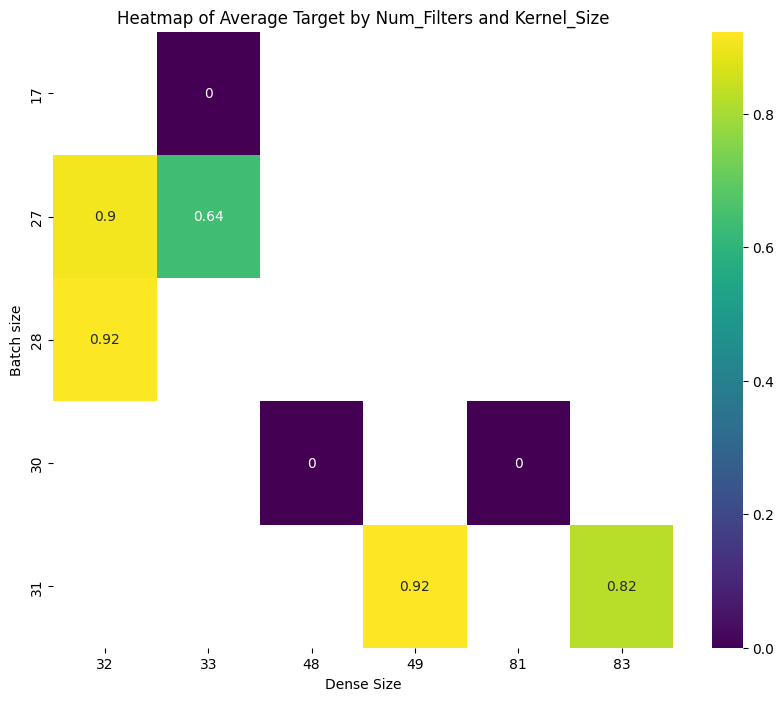

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df and has columns 'num_filters', 'kernel_size', and 'target'

# Step 1: Pivot the DataFrame
pivot_table = df.pivot_table(index='batch_size', columns='dense_size', values='target', aggfunc='mean')

# Step 2: Create the Heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size to fit your needs
sns.heatmap(pivot_table, annot=True, cmap='viridis')  # annot=True will annotate the cells with the mean values

# Adding titles and labels
plt.title('Heatmap of Average Target by Num_Filters and Kernel_Size')
plt.xlabel('Dense Size')
plt.ylabel('Batch size')

# Show the plot
plt.show()
